In [82]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import yfinance as yf

In [83]:
# Load data
tickers = ['AAPL', 'KO', 'IBM']

# Download weekly historical data for the tickers from 2010-01-01 to 2017-12-31
data = yf.download(tickers, start='2010-01-01', end='2017-12-31', interval='1wk')

[*********************100%%**********************]  3 of 3 completed


In [84]:
data = data['Adj Close']
data

Ticker,AAPL,IBM,KO
Date,,,
2010-01-01,6.351058,73.703918,17.938570
2010-01-08,6.316374,75.274147,18.238663
2010-01-15,6.275354,73.391022,17.357540
2010-01-22,6.010553,70.404182,17.296883
2010-01-29,5.792196,69.977501,17.057446
...,...,...,...
2017-12-01,39.876534,107.056381,37.264797
2017-12-08,40.559509,107.356186,37.468288
2017-12-15,41.216576,105.613335,37.118271


In [108]:
history = np.array([])
np.random.seed(123)
cash = 100
positions = np.array([0, 0, 0])
actions = [-1, 0, 1]

trades = np.random.choice(actions, 3)
positions += trades
port_value = positions * data.loc['2010-01-01'].values
cash -= port_value.sum()
nw = cash + port_value.sum()
history = np.append(history, nw)


for d in data.index[1:]:
    port_value = positions * data.loc[d].values
    nw = cash + port_value.sum()
    history = np.append(history, nw)

    if nw < 0:
        print(d, nw, 'Dead!')
        break
    else:
        trades = np.random.choice(actions, 3)
        positions += trades
        cash -= (trades * data.loc[d].values).sum()

2011-07-01 00:00:00 -13.276519775390625 Dead!


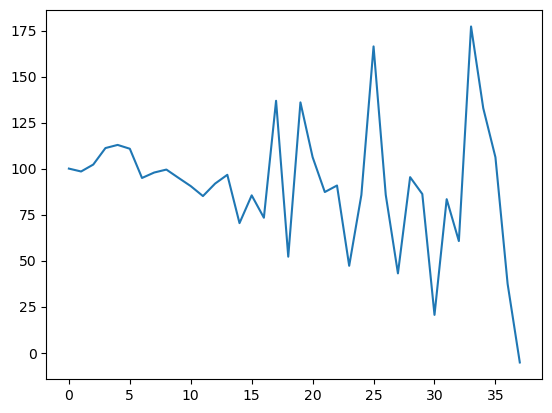

In [105]:
plt.plot(history)

The random strategy goes bankrupt in July 2011